In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_classification_Dataset'


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.convnext import preprocess_input
IMG_SIZE = (224, 224)
BATCH_SIZE = 256

# Data augmentation and preprocessing (ConvNeXtBase preprocessing)
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training data
train_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
)
# Load and preprocess test images
test_generator = datagen.flow_from_directory(
    '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test',  # Path to the test dataset
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 1703 images belonging to 3 classes.
Found 188 images belonging to 3 classes.
Found 473 images belonging to 3 classes.


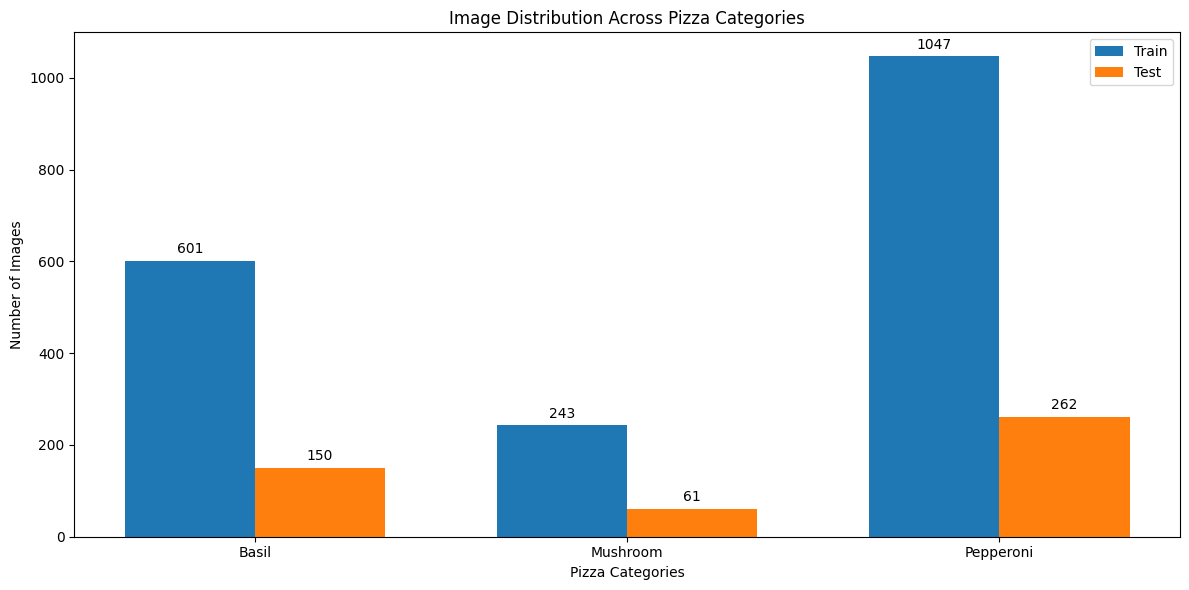

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Define your data paths
train_data_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/train'
test_data_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test'

# Define your pizza categories
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

# Initialize counts for each category
train_counts = {category: 0 for category in pizza_categories}
test_counts = {category: 0 for category in pizza_categories}

# Count images in train dataset
for category in pizza_categories:
    category_path = os.path.join(train_data_path, category)
    train_counts[category] = len(os.listdir(category_path))

# Count images in test dataset
for category in pizza_categories:
    category_path = os.path.join(test_data_path, category)
    test_counts[category] = len(os.listdir(category_path))

df = pd.DataFrame({
    'Category': pizza_categories,
    'Train Count': list(train_counts.values()),
    'Test Count': list(test_counts.values())
})

# Get the positions for the bars
x = np.arange(len(pizza_categories))
width = 0.35  # Width of the bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, df['Train Count'], width, label='Train')
rects2 = ax.bar(x + width/2, df['Test Count'], width, label='Test')

# Add labels, title, and legend
ax.set_xlabel('Pizza Categories')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution Across Pizza Categories')
ax.set_xticks(x)
ax.set_xticklabels(pizza_categories)
ax.legend()

# Add count labels using the provided code snippet
for index, row in df.iterrows():
    plt.text(x=index - width/2, y=row['Train Count'] + 10, s=str(row['Train Count']), ha='center', va='bottom', fontsize=10)
    plt.text(x=index + width/2, y=row['Test Count'] + 10, s=str(row['Test Count']), ha='center', va='bottom', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

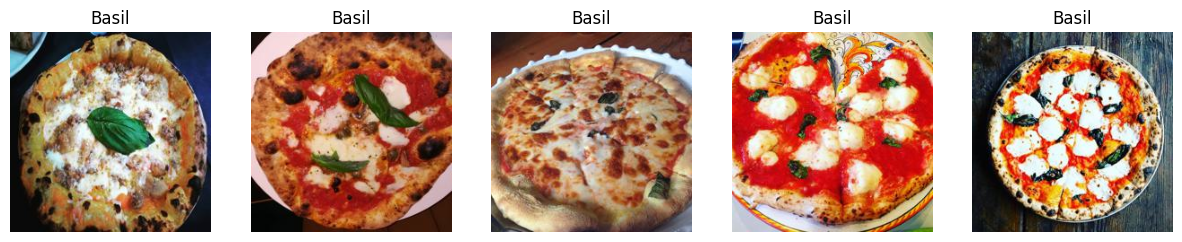

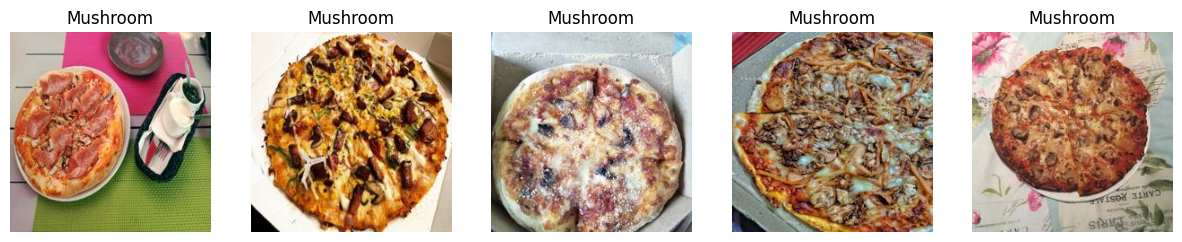

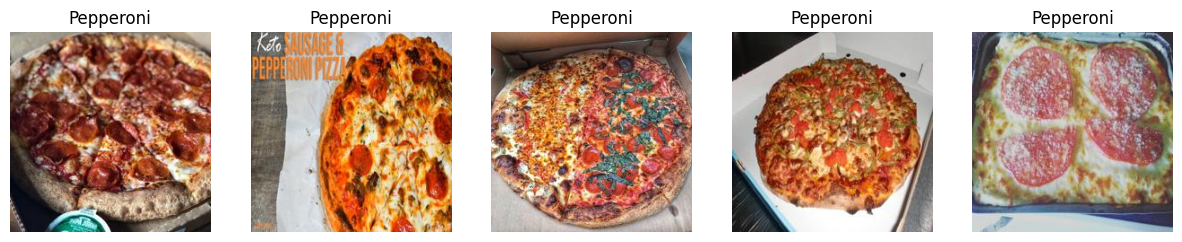

In [5]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

def plot_sample_images(img_paths, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, img_path in enumerate(img_paths[:num_images]):
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(labels[i])
        axes[i].axis('off')
    plt.show()

# Define your data paths and pizza categories
data_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/train'
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

for category in pizza_categories:
    category_path = os.path.join(data_path, category)
    all_img_files = os.listdir(category_path)
    random_img_files = random.sample(all_img_files, 5)
    img_paths = [os.path.join(category_path, img_file) for img_file in random_img_files]
    plot_sample_images(img_paths, [category] * len(img_paths))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Define data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Add rotation
    width_shift_range=0.2,  # Add width shift
    height_shift_range=0.2, # Add height shift
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'
)

# Define your data paths and pizza categories
data_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/train'
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

# Loop through each pizza category and plot sample images
for category in pizza_categories:
    category_path = os.path.join(data_path, category)

    # Randomly select an image from the directory
    img_name = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, img_name)

    # Load a single image and apply augmentation
    img = Image.open(img_path).resize((224, 224))
    img = img.convert('RGB')  # Ensure RGB format
    img = np.array(img)
    img = img.reshape((1, 224, 224, 3))

    # Generate augmented images
    augmented_imgs = [datagen.flow(img, batch_size=1).__next__()[0] for _ in range(5)]

    # Plot original and augmented images
    fig, axes = plt.subplots(1, 6, figsize=(20, 5))
    axes[0].imshow(img[0].astype('uint8'))  # Original image
    axes[0].set_title(f"Original {category} Image")

    for i, aug_img in enumerate(augmented_imgs):
        aug_img = (aug_img * 255).astype('uint8')  # Rescale augmented image to 0-255
        axes[i + 1].imshow(aug_img)
        axes[i + 1].set_title(f"Augmented {category} Image {i+1}")

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [7]:
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Create Precision and Recall metrics outside the function
precision_metric = Precision()
recall_metric = Recall()

# Custom F1-score metric
def f1_score(y_true, y_pred):
    precision = precision_metric(y_true, y_pred)  # Use pre-created metric
    recall = recall_metric(y_true, y_pred)       # Use pre-created metric
    f1 = 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    return f1

# Apply mixed precision for faster training and less GPU load
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

# Load pre-trained ConvNeXtBase model without the top classification layer
base_model = ConvNeXtBase(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pre-trained weights
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
# Apply the output layer to the previous layer's output
output = Dense(3, activation='softmax')(x)  # 3 classes: Basil, Mushroom, Pepperoni

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_prestem_no… │ (None, 224, 224, 3)    │              0 │ cast[0][0]             │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stem        │ (None, 56, 56, 128)    │          6,528 │ convnext_base_prestem… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │          6,400 │ convnext_base_stem[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │            256 │ convnext_base_stage_0… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 512)    │         66,048 │ convnext_base_stage_0… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 512)    │              0 │ convnext_base_stage_0… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │         65,664 │ convnext_base_stage_0… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │            128 │ convnext_base_stage_0… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │              0 │ convnext_base_stage_0… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 128)    │              0 │ convnext_base_stem[0]… │
│                           │                        │                │ convnext_base_stage_0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │          6,400 │ add[0][0]              │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_base_stage_0_bl… │ (None, 56, 56, 128)    │            256 │ convnext_base_stage_0… │
│ (LayerNormalization) 

 Total params: 88,092,803 (336.05 MB)

 Trainable params: 526,339 (2.01 MB)

 Non-trainable params: 87,566,464 (334.04 MB)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=70,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 228s 31s/step - accuracy: 0.4780 - f1_score: 0.3772 - loss: 1.5539 - precision: 0.4986 - recall: 0.4272 - val_accuracy: 0.7128 - val_f1_score: 0.5546 - val_loss: 0.8859 - val_precision: 0.7128 - val_recall: 0.7128
Epoch 2/70
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.7109 - f1_score: 0.5767 - loss: 0.9667 - precision: 0.7165 - recall: 0.7109

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.7109 - f1_score: 0.5767 - loss: 0.9667 - precision: 0.7165 - recall: 0.7109 - val_accuracy: 0.6064 - val_f1_score: 0.5795 - val_loss: 0.9983 - val_precision: 0.6064 - val_recall: 0.6064
Epoch 3/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.7256 - f1_score: 0.6059 - loss: 0.7199 - precision: 0.7536 - recall: 0.6980 - val_accuracy: 0.8138 - val_f1_score: 0.6556 - val_loss: 0.4510 - val_precision: 0.8606 - val_recall: 0.7553
Epoch 4/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 0.8164 - f1_score: 0.6647 - loss: 0.4762 - precision: 0.8502 - recall: 0.7539 - val_accuracy: 0.8511 - val_f1_score: 0.6727 - val_loss: 0.3528 - val_precision: 0.8786 - val_recall: 0.8085
Epoch 5/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.8259 - f1_score: 0.6910 - loss: 0.4470 - precision: 0.8464 - recall: 0.7987 - val_accuracy: 0.8883 - val_f1_score: 0.7222 - val_loss: 0.2868 - val_precision: 0.9006 - val_recall: 0.8670
Epoch 6/70
6/6 

In [10]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9309 - f1_score: 0.9128 - loss: 0.2221 - precision: 0.9454 - recall: 0.9202
Test Accuracy: 93.09%


In [11]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Use a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), f1_score]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=70,  # Add more epochs for fine-tuning
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.9640 - f1_score: 0.9133 - loss: 0.1130 - precision: 0.9686 - recall: 0.9574 - val_accuracy: 0.9309 - val_f1_score: 0.9139 - val_loss: 0.2260 - val_precision: 0.9355 - val_recall: 0.9255
Epoch 2/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 60s 498ms/step - accuracy: 0.9102 - f1_score: 0.9138 - loss: 0.2072 - precision: 0.9085 - recall: 0.8922 - val_accuracy: 0.9362 - val_f1_score: 0.9139 - val_loss: 0.1847 - val_precision: 0.9459 - val_recall: 0.9309
Epoch 3/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.9636 - f1_score: 0.9143 - loss: 0.1160 - precision: 0.9646 - recall: 0.9554 - val_accuracy: 0.9202 - val_f1_score: 0.9148 - val_loss: 0.2446 - val_precision: 0.9202 - val_recall: 0.9202
Epoch 4/70
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 498ms/step - accuracy: 0.9688 - f1_score: 0.9149 - loss: 0.0932 - precision: 0.9688 - recall: 0.9688 - val_accuracy: 0.9309 - val_f1_score: 0.9150 - val_loss: 0.2034 - val_precision: 0.9301 - val_recall: 0.9202
Ep

In [13]:
# Evaluate the model and unpack the returned values appropriately
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model.evaluate(validation_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9362 - f1_score: 0.9454 - loss: 0.2286 - precision: 0.9412 - recall: 0.9362
Test Accuracy: 93.62%


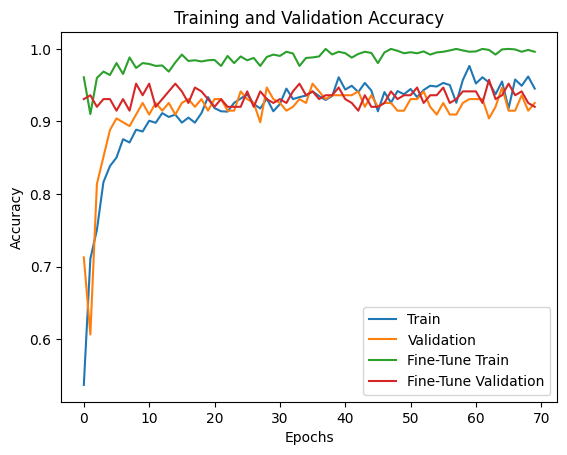

In [14]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.plot(fine_tune_history.history['accuracy'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_accuracy'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

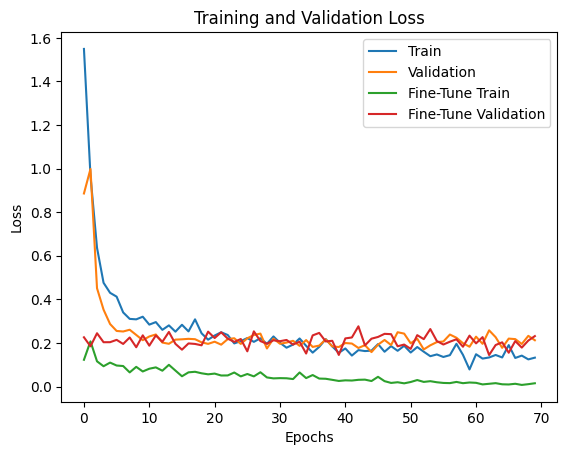

In [15]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.plot(fine_tune_history.history['loss'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_loss'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

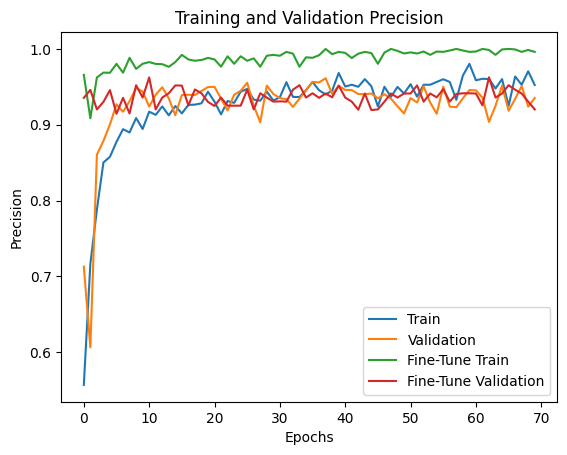

In [16]:
# Plot training & validation precision
plt.plot(history.history['precision'], label='Train')
plt.plot(history.history['val_precision'], label='Validation')
plt.plot(fine_tune_history.history['precision'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_precision'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.title('Training and Validation Precision')
plt.show()

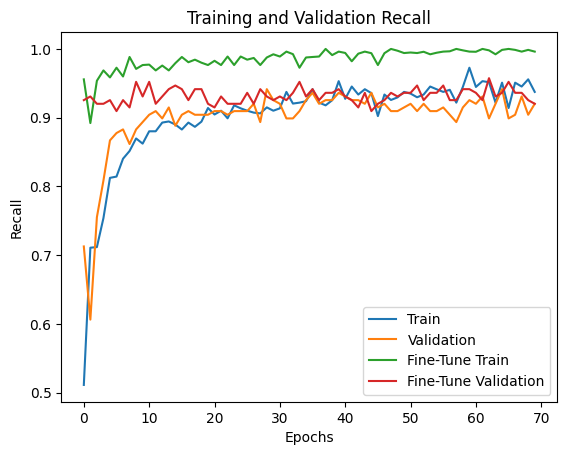

In [17]:
# Plot training & validation recall
plt.plot(history.history['recall'], label='Train')
plt.plot(history.history['val_recall'], label='Validation')
plt.plot(fine_tune_history.history['recall'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_recall'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.title('Training and Validation Recall')
plt.show()

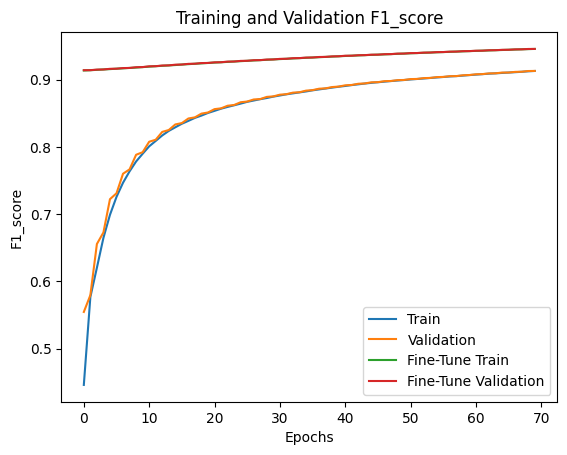

In [18]:
# Plot training & validation f1_score
plt.plot(history.history['f1_score'], label='Train')
plt.plot(history.history['val_f1_score'], label='Validation')
plt.plot(fine_tune_history.history['f1_score'], label='Fine-Tune Train')
plt.plot(fine_tune_history.history['val_f1_score'], label='Fine-Tune Validation')
plt.xlabel('Epochs')
plt.ylabel('F1_score')
plt.legend()
plt.title('Training and Validation F1_score')
plt.show()

In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

# Define the path to the Basil folder
basil_folder_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test/Basil'

# Get a list of all image files in the Basil folder
image_files = [f for f in os.listdir(basil_folder_path) if os.path.isfile(os.path.join(basil_folder_path, f))]

# Define your pizza categories
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

# Loop through each image file and make a prediction
for image_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(basil_folder_path, image_file)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make the prediction
    prediction = model.predict(img_array)

    # Get the predicted class index and category label
    predicted_class_index = np.argmax(prediction)
    predicted_category = pizza_categories[predicted_class_index]

    # Print the prediction for the current image
    print(f"Image: {image_file}, Predicted category: {predicted_category}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
Image: 00041_2e288952c8c5487385b422c992bcabf0.jpg, Predicted category: Basil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Image: 00090_c716676519134b5c9939345770ccabc1.jpg, Predicted category: Basil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: 00163_81917be87b6e4154b63d47bd0bc29fc1.jpg, Predicted category: Basil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 00202_77fd66d2451844aab1f27af3e360a6ba.jpg, Predicted category: Basil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 00167_d9243f9425ee49bdbcd42e26863acc63.jpg, Predicted category: Basil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Image: 00035_8e450d7210014eadba06671977704a2a.jpg, Predicted category: Basil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: 00115_86ff734cd14a41fdbe13da1aab281e4c.jpg, Predicted category: Pepperoni
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Image: 01453_e3ebea7c7b3e4c17a91b8c0ed0d6be71.jpg, Predicted category: Basil
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Image: 01205_94dba2062afa46fcaa29ebaf9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━

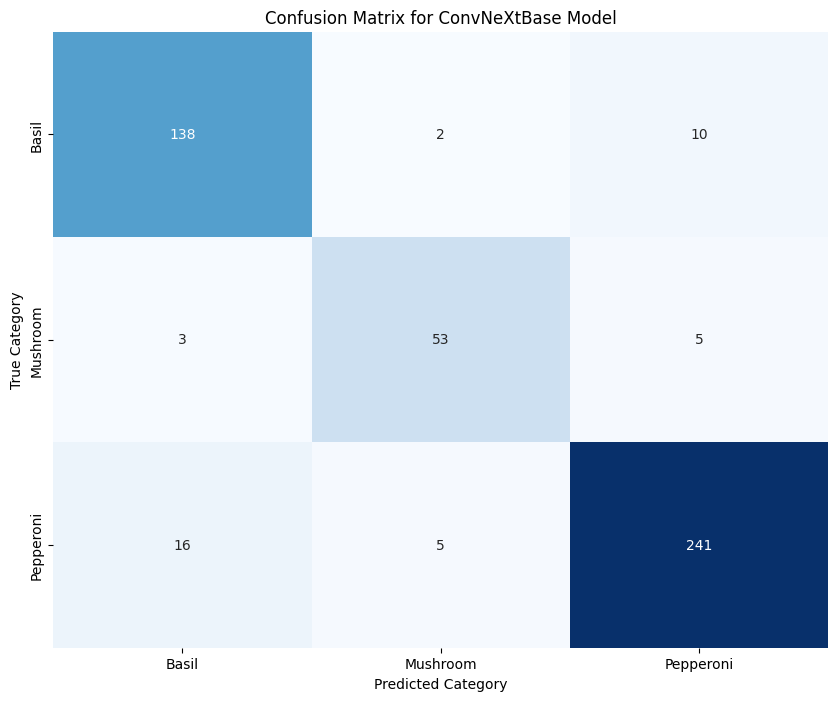

In [20]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define your pizza categories
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

# Initialize empty lists to store all predicted and true categories
all_predicted_categories = []
all_true_categories = []

# Loop through each pizza category
for category in pizza_categories:
    # Define the path to the category folder
    category_folder_path = os.path.join('/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test', category)

    # Get a list of all image files in the category folder
    image_files = [f for f in os.listdir(category_folder_path) if os.path.isfile(os.path.join(category_folder_path, f))]

    # Loop through each image file and make a prediction
    for image_file in image_files:
        # Construct the full path to the image
        img_path = os.path.join(category_folder_path, image_file)

        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make the prediction
        prediction = model.predict(img_array)

        # Get the predicted class index and category label
        predicted_class_index = np.argmax(prediction)
        predicted_category = pizza_categories[predicted_class_index]

        # Append the predicted and true categories to the lists
        all_predicted_categories.append(predicted_category)
        all_true_categories.append(category)  # True category is the current category

# Convert the lists to NumPy arrays
all_predicted_categories = np.array(all_predicted_categories)
all_true_categories = np.array(all_true_categories)

# Create the confusion matrix
cm_all_categories = confusion_matrix(all_true_categories, all_predicted_categories, labels=pizza_categories)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_all_categories, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=pizza_categories, yticklabels=pizza_categories)
plt.title("Confusion Matrix for ConvNeXtBase Model")
plt.xlabel("Predicted Category")
plt.ylabel("True Category")
plt.show()

In [21]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications.convnext import preprocess_input

# Define pizza categories
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test'

true_labels = []
predicted_labels = []

# Loop through each pizza category folder in the Test folder
for category_index, category in enumerate(pizza_categories):
    category_folder_path = os.path.join(test_folder_path, category)

    # Loop through images in the category folder
    for image_file in os.listdir(category_folder_path):
        img_path = os.path.join(category_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class_index = np.argmax(prediction)

        # Append labels
        true_labels.append(category_index)  # Use category_index for true label
        predicted_labels.append(predicted_class_index)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=range(len(pizza_categories)))

# Print TP, FP, TN, FN for each category
for category_index, category in enumerate(pizza_categories):
    TP = cm[category_index, category_index]
    FP = sum(cm[i, category_index] for i in range(len(pizza_categories)) if i != category_index)
    FN = sum(cm[category_index, i] for i in range(len(pizza_categories)) if i != category_index)
    TN = sum(cm[i, j] for i in range(len(pizza_categories)) for j in range(len(pizza_categories)) if i != category_index and j != category_index)

    print(f"For {category} Category:")
    print("True Positives (TP):", TP)
    print("False Positives (FP):", FP)
    print("True Negatives (TN):", TN)
    print("False Negatives (FN):", FN)
    print("-" * 20)  # Separator between categories

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━

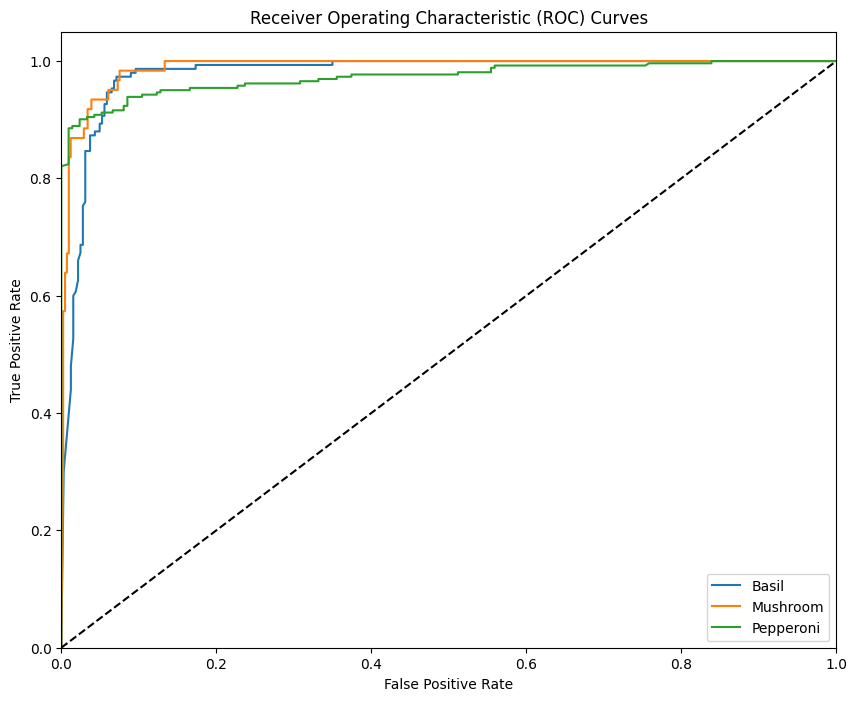

In [22]:
from tensorflow.keras.applications.convnext import preprocess_input
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define pizza categories
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

# Path to your Test folder
test_folder_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test'

# Initialize lists to store true and predicted probabilities for each class
true_labels = []
predicted_probabilities = []

# Loop through each pizza category folder in the Test folder
for category_index, category in enumerate(pizza_categories):
    category_folder_path = os.path.join(test_folder_path, category)

    # Loop through images in the category folder
    for image_file in os.listdir(category_folder_path):
        img_path = os.path.join(category_folder_path, image_file)
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)

        # Make prediction (get probabilities)
        prediction = model.predict(img_array)[0]  # Get probabilities for all classes

        # Append true label (one-hot encoded) and predicted probabilities
        true_label = np.zeros(len(pizza_categories))
        true_label[category_index] = 1  # One-hot encoding
        true_labels.append(true_label)
        predicted_probabilities.append(prediction)

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_probabilities = np.array(predicted_probabilities)

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(len(pizza_categories)):
    fpr, tpr, _ = roc_curve(true_labels[:, i], predicted_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{pizza_categories[i]}')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [35]:
model.save('/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Topping_Classification_ConvNeXtbase.h5')

In [36]:
!pip install tf-keras-vis

In [42]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.applications.convnext import preprocess_input
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D

def find_last_conv_layer(model):
    """Finds the last convolutional layer in the model."""
    conv_layers = []
    for layer in model.layers:
      if isinstance(layer, (Conv2D, DepthwiseConv2D)):
        conv_layers.append(layer)
    if not conv_layers:
        raise ValueError("No convolutional layers found in the model.")
    return conv_layers[-1].name


def grad_cam_heatmap(model, image, layer_name=None):
    """Generates a Grad-CAM heatmap. If layer_name is None, the last conv layer will be used"""
    if layer_name is None:
        layer_name = find_last_conv_layer(model)

    gradcam = Gradcam(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Define pizza categories
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

data_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test'

# Loop through each pizza category
for category in pizza_categories:
    print(f"Processing category: {category}")
    category_path = os.path.join(data_path, category)
    img_names = os.listdir(category_path)

    if len(img_names) < 3:
        print(f"Skipping {category}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(category_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per category
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = pizza_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [43]:
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.utils import normalize
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.convnext import preprocess_input
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D


def find_last_conv_layer(model):
    """Finds the last convolutional layer in the model."""
    conv_layers = []
    for layer in model.layers:
      if isinstance(layer, (Conv2D, DepthwiseConv2D)):
        conv_layers.append(layer)
    if not conv_layers:
        raise ValueError("No convolutional layers found in the model.")
    return conv_layers[-1].name


def grad_cam_plus_plus_heatmap(model, image, layer_name=None):
    """Generates a Grad-CAM++ heatmap. If layer_name is None, the last conv layer will be used"""
    if layer_name is None:
        layer_name = find_last_conv_layer(model)

    gradcam_plus_plus = GradcamPlusPlus(model, clone=False)

    def loss(output):
        predicted_class = np.argmax(model.predict(image))
        return output[:, predicted_class]

    cam = gradcam_plus_plus(loss, image, penultimate_layer=layer_name)
    cam = normalize(cam)
    return cam

# Define pizza categories
pizza_categories = ['Basil', 'Mushroom', 'Pepperoni']

# Modified Grad-CAM++ Visualization for random images from Test folder
data_path = '/content/drive/My Drive/Pizza Topping Classification Project/Pizza_Classification_Dataset/test'

# Loop through each pizza category
for category in pizza_categories:
    print(f"Processing category: {category}")
    category_path = os.path.join(data_path, category)
    img_names = os.listdir(category_path)

    if len(img_names) < 3:
        print(f"Skipping {category}, not enough images.")
        continue

    img_paths = random.sample([os.path.join(category_path, img) for img in img_names], 3)

    # Process 3 randomly selected images per category
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        heatmap = grad_cam_plus_plus_heatmap(model, x)
        heatmap = np.uint8(255 * heatmap[0])

        fig, axes = plt.subplots(1, 2, figsize=(10, 5))

        axes[0].imshow(img)
        axes[0].set_title("Original Image")
        axes[0].axis('off')

        axes[1].imshow(img)
        axes[1].imshow(heatmap, cmap='jet', alpha=0.5)
        predicted_category = pizza_categories[np.argmax(model.predict(x))]
        axes[1].set_title(f"Predicted Category: {predicted_category}")
        axes[1].axis('off')

        plt.tight_layout()
        plt.show()

Output hidden; open in https://colab.research.google.com to view.